In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("./name_gender_dataset.csv")

In [ ]:
data.shape

(95024, 3)

In [ ]:
data.head()

,Name,Gender,prob
0,Aabha,F,1.0
1,Aabid,M,1.0
2,Aabriella,F,1.0
3,Aada,F,1.0
4,Aadam,M,1.0


In [ ]:
data['Name'].nunique()

95024

In [ ]:
data['Gender'] = data['Gender'].astype('category').cat.codes

In [ ]:
df = data.groupby('Name').mean()['Gender'].reset_index()

In [ ]:
df.head()

,Name,Gender
0,Aabha,0.0
1,Aabid,1.0
2,Aabriella,0.0
3,Aada,0.0
4,Aadam,1.0


In [ ]:
df['Gender'] = df['Gender'].astype('int')
df.head()

,Name,Gender
0,Aabha,0
1,Aabid,1
2,Aabriella,0
3,Aada,0
4,Aadam,1


In [ ]:
import string

In [ ]:
letters = list(string.ascii_lowercase)
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [ ]:
vocab = dict(zip(letters, range(1,27)))
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [ ]:
r_vocab = dict(zip(range(1,27),letters))
r_vocab

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [ ]:
def word_to_number():
    for i in range(0, df.shape[0]):
        seq = [ vocab[letters.lower()] for letters in df['Name'][i] ]
        df['Name'][i] = seq  

In [ ]:
word_to_number()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df.head()

,Name,Gender
0,"[1, 1, 2, 8, 1]",0
1,"[1, 1, 2, 9, 4]",1
2,"[1, 1, 2, 18, 9, 5, 12, 12, 1]",0
3,"[1, 1, 4, 1]",0
4,"[1, 1, 4, 1, 13]",1


In [ ]:
x = df['Name'].values
y = df['Gender'].values

In [ ]:
name_length = [len(x[i])for i in range (0,df.shape[0])]

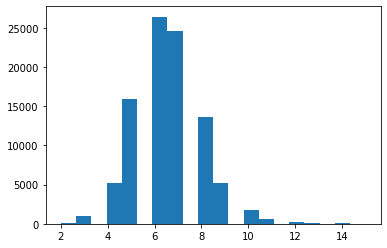

In [ ]:
plt.hist(name_length,bins=20)
plt.show()

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
x = pad_sequences(df['Name'].values,maxlen = 10, padding = 'pre')

In [ ]:
x

array([[ 0,  0,  0, ...,  2,  8,  1],
       [ 0,  0,  0, ...,  2,  9,  4],
       [ 0,  1,  1, ..., 12, 12,  1],
       ...,
       [ 0,  0,  0, ..., 14, 14,  1],
       [ 0,  0,  0, ..., 25, 15, 14],
       [ 0,  0,  0, ..., 25, 26, 24]], dtype=int32)

In [ ]:
from keras.layers import Input, Embedding, Dense, LSTM
from keras.models import Model

In [ ]:
vocab_size = len(vocab)+1
vocab_size

27

In [ ]:
inp = Input(shape = (10,))
emn = Embedding(input_dim =vocab_size, output_dim=5)(inp)

lstm1 = LSTM(units = 32,return_sequences=True)(emn)
lstm2 = LSTM(units=64)(lstm1)

out = Dense(units=1 , activation='sigmoid')(lstm2)

my_model = Model(inputs = inp, outputs = out)

In [ ]:
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 10, 5)             135       
                                                                 
 lstm_4 (LSTM)               (None, 10, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 64)                24832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 29,896
Trainable params: 29,896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model.compile(optimizer='adam', loss = 'binary_crossentropy',  metrics=['acc'])

In [ ]:
his = my_model.fit(x, y, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10
297/297 [==============================] - 17s 40ms/step - loss: 0.5712 - acc: 0.6959 - val_loss: 0.4067 - val_acc: 0.8242
Epoch 2/10
297/297 [==============================] - 16s 54ms/step - loss: 0.4012 - acc: 0.8176 - val_loss: 0.3843 - val_acc: 0.8321
Epoch 3/10
297/297 [==============================] - 11s 36ms/step - loss: 0.3905 - acc: 0.8246 - val_loss: 0.3826 - val_acc: 0.8331
Epoch 4/10
297/297 [==============================] - 12s 39ms/step - loss: 0.3869 - acc: 0.8257 - val_loss: 0.3831 - val_acc: 0.8309
Epoch 5/10
297/297 [==============================] - 15s 52ms/step - loss: 0.3832 - acc: 0.8273 - val_loss: 0.3967 - val_acc: 0.8219
Epoch 6/10
297/297 [==============================] - 13s 44ms/step - loss: 0.3795 - acc: 0.8296 - val_loss: 0.3797 - val_acc: 0.8316
Epoch 7/10
297/297 [==============================] - 13s 43ms/step - loss: 0.3757 - acc: 0.8312 - val_loss: 0.3731 - val_acc: 0.8353
Epoch 8/10
297/297 [==============================] - 11s 37ms

In [ ]:
h = his.history

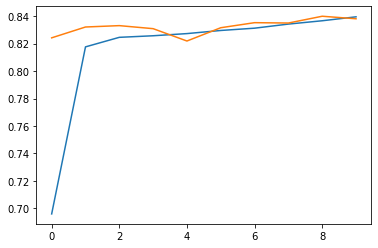

In [ ]:
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.show()

In [ ]:
name = "Priti"
test_name = name.lower()

seq = [vocab[i] for i in  test_name]

x_test = pad_sequences([seq],10)
x_test

array([[ 0,  0,  0,  0,  0, 16, 18,  9, 20,  9]], dtype=int32)

In [ ]:
y_pred = my_model.predict(x_test)
y_pred

array([[0.23325053]], dtype=float32)

In [ ]:
if y_pred < 0.5:
  print('Female')
else:
  print('Male')  

Female
